In [1]:
from rfpipe import candidates, state, metadata
import pylab as plt
import numpy as np
import glob
%matplotlib inline

/lustre/aoc/observers/nm-10222/anaconda3/envs/temp/lib/python3.6/site-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)
/lustre/aoc/observers/nm-10222/anaconda3/envs/temp/lib/python3.6/site-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


In [2]:
pkl = 'cands_realfast_TFST0001_sb37598254_1_1_000.58833.909638495374_1576534842510.1.1.pkl'
ccs = list(candidates.iter_cands(pkl, select='candcollection'))

In [3]:
ccs

[CandCollection for realfast_TFST0001_sb37598254_1_1_000.58833.909638495374_1576534842510, scan 1, segment 0 with 1201 candidates,
 CandCollection for realfast_TFST0001_sb37598254_1_1_000.58833.909638495374_1576534842510, scan 1, segment 0 with 4 candidates,
 CandCollection for realfast_TFST0001_sb37598254_1_1_000.58833.909638495374_1576534842510, scan 1, segment 0 with 4 candidates]

# Candidates from Very Fine DM search

In [4]:
cc = ccs[0]

In [5]:
staging='/lustre/aoc/projects/fasttransients/staging/'
sdms_1933 = glob.glob(staging+'*sb37598254_1_1_000.58833*')
preffile = '/lustre/aoc/observers/nm-10222/fetchrf/scripts/realfast.yml'
gainpath = '/home/mchammer/evladata/telcal/2019/12/'

In [6]:
sdmfile = sdms_1933[0]

In [7]:
bdfdir = metadata.get_bdfdir(sdmfile=sdmfile, sdmscan=1)
band = metadata.sdmband(sdmfile=sdmfile, sdmscan=1, bdfdir=bdfdir)
st = state.State(sdmfile=sdmfile, sdmscan=1, preffile=preffile, 
                 name='NRAOdefault'+band, showsummary=False, bdfdir=bdfdir)

2020-01-03 22:14:19,615 - rfpipe.metadata - INFO - Reading metadata from /lustre/aoc/projects/fasttransients/staging/realfast_TFST0001_sb37598254_1_1_000.58833.909638495374_1576534842510, scan 1
2020-01-03 22:14:19,677 - rfpipe.preferences - INFO - Parsing preffile for preference set NRAOdefaultL
2020-01-03 22:14:19,696 - rfpipe.metadata - INFO - Reading metadata from /lustre/aoc/projects/fasttransients/staging/realfast_TFST0001_sb37598254_1_1_000.58833.909638495374_1576534842510, scan 1


In [8]:
dmarr_orig = np.array(st.dmarr)

In [10]:
dms = dmarr_orig[(dmarr_orig < cc.canddm.max()) & (dmarr_orig > cc.canddm.min())]

In [32]:
dms

array([155.8, 164. ])

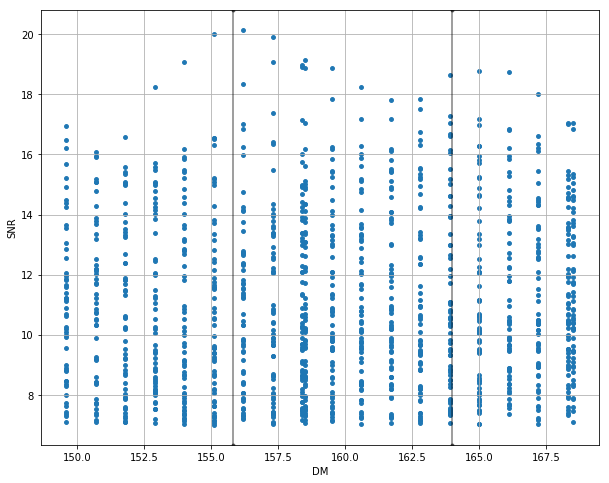

In [31]:
fig,ax = plt.subplots(1, figsize=(10,8))
ax.scatter(cc.canddm,cc.snrtot, s=15)
for dm in dms:
    plt.axvline(x=dm, color='k', marker='.', alpha=0.5) # Markers for dms in original dmarray
plt.xlabel('DM')
plt.ylabel('SNR')
plt.grid()

In [33]:
cc.canddm[cc.snrtot == np.max(cc.snrtot)]

array([156.2])

In [34]:
ccs[1].canddm, ccs[1].snrtot

(array([156.1  , 158.521, 158.55 , 158.9  ]),
 array([20.200634 ,  8.333247 ,  8.333247 ,  7.9679503], dtype=float32))

# Highest SNR Candidate plot

In [36]:
cc_ = ccs[2]

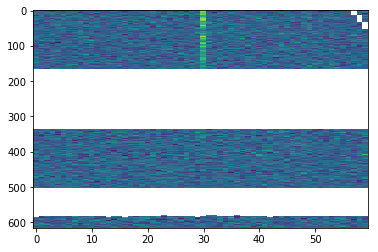

In [37]:
cd_max_snr = cc_.canddata[0]
cd = cd_max_snr

ft_dedisp = (cd.data.real.sum(axis=2).T)

plt.imshow(ft_dedisp, aspect='auto')

chan_freqs = cd.state.freq*1000  # from low to high, MHza

# plt.scatter(x=chan_freqs, y=ft_dedisp.sum(1))
# plt.xlabel('Freq (MHz)')
# plt.grid()

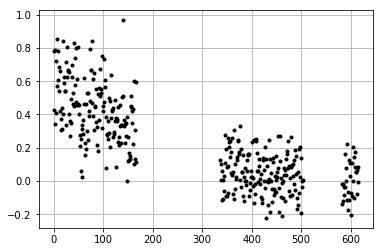

In [38]:
data = cd.data
spectra = np.swapaxes(data.real, 0, 1)

spectrum = spectra[:, cd.integration_rel].mean(axis=1)

plt.plot(list(range(len(spectrum))), spectrum, 'k.')
plt.grid()